**Importing The Required Libraries**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import tensorflow as tf 
import cv2 as cv
import os


test_path="E:\github\ML-ProjectKart\Driver Drowsiness Detection System\Dataset\New_Test"

just a sample (to check whether it's working or not)


---



In [ ]:
img = cv.imread("E:\github\ML-ProjectKart\Driver Drowsiness Detection System\Dataset\New_Test\Closed_Eyes\s0012_00309_0_0_0_0_0_01.png",cv.IMREAD_GRAYSCALE) 
plt.show(img)

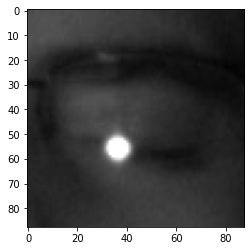

In [ ]:
Datadirectory= test_path   #training dataset
Classes=["Closed_Eyes","Open_Eyes"]   #list of classes
for category in Classes:
  path = os.path.join(Datadirectory,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    backtorgb = cv.cvtColor(img_array,cv.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

Resizing the image to size 224

---



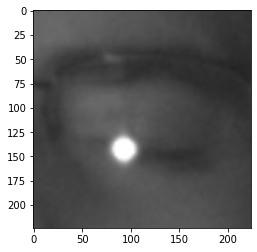

In [ ]:
img_size=224

new_array = cv.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

#reading all the images and converting them into an array for data and labels

In [ ]:
training_Data = []
def create_training_Data():
    for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category) # 0 1,
      for img in os.listdir(path):
        try: 
          img_array = cv.imread(os.path.join(path,img), cv.IMREAD_GRAYSCALE)
          backtorgb = cv.cvtColor(img_array,cv.COLOR_GRAY2RGB)
          new_array = cv.resize(backtorgb, (img_size,img_size))
          training_Data.append([new_array,class_num])
        except Exception as e:
          pass

In [ ]:
create_training_Data()

In [ ]:
print(len(training_Data))

3000


In [ ]:
import random
random.shuffle(training_Data)

In [ ]:
X = []
y = []

for features,label in training_Data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)



In [ ]:
X.shape

(3000, 224, 224, 3)

In [ ]:
#normalizing the data
X= X/255.0; ## normalizing data

In [ ]:
Y=np.array(y)

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# deep learning model for training - Training learning

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2 

In [ ]:
model=tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

**Transfer Learning**


In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
Flat_layer= layers.Flatten()(base_output)
final_output= layers.Dense(1)(Flat_layer)
final_output= layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

**Settings for binary classification(open / closed)**

In [ ]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [ ]:
new_model.fit(X, Y, epochs= 8,validation_split=0.1)   
# also try training the model for 20 epochs & check the predictions (prediction=0 for closed eyes & prediction=1 for open eyes)

Epoch 1/8
85/85 [==============================] - 605s 7s/step - loss: 0.1471 - accuracy: 0.9457 - val_loss: 0.3901 - val_accuracy: 0.8300
Epoch 2/8
85/85 [==============================] - 560s 7s/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0520 - val_accuracy: 0.9800
Epoch 3/8
85/85 [==============================] - 520s 6s/step - loss: 0.0109 - accuracy: 0.9962 - val_loss: 0.0397 - val_accuracy: 0.9867
Epoch 4/8
85/85 [==============================] - 530s 6s/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 6.3800e-04 - val_accuracy: 1.0000
Epoch 5/8
85/85 [==============================] - 543s 6s/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 1.2242e-04 - val_accuracy: 1.0000
Epoch 6/8
85/85 [==============================] - 549s 6s/step - loss: 0.0030 - accuracy: 0.9975 - val_loss: 8.3979e-06 - val_accuracy: 1.0000
Epoch 7/8
85/85 [==============================] - 547s 6s/step - loss: 6.4661e-05 - accuracy: 1.0000 - val_loss: 3.5015e-06 - val_accuracy: 1.0000


In [ ]:
new_model.save('my_model2.h5')

**Loading the model**

---



In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('E:\github\ML-ProjectKart\Driver Drowsiness Detection System\models\my_model2.h5')

**Check the network for predictions**

**LET'S CHECK ON UNKNOWN IMAGES**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2 


img_size=224
img_array = cv2.imread('E:\github\ML-ProjectKart\Driver Drowsiness Detection System\Images\img2.jpg', cv2.IMREAD_GRAYSCALE)
backtorgb =cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size, img_size))

In [ ]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [ ]:
X_input.shape

(1, 224, 224, 3)

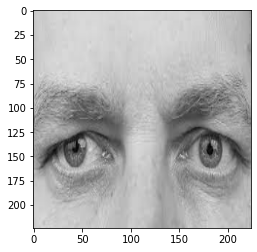

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input=X_input/255.0

In [ ]:
prediction = new_model.predict(X_input)

In [ ]:
prediction

array([[1.]], dtype=float32)

In [ ]:
img = cv2.imread('E:\github\ML-ProjectKart\Driver Drowsiness Detection System\Images\img4.jpg')

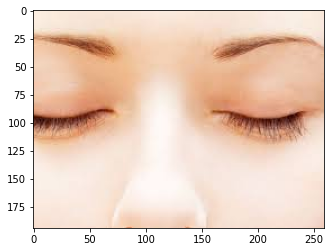

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [ ]:
for(x,y,w,h) in eyes:
  cv2.rectangle(img,(x, y), (x+w, y+h), (0, 255, 0), 2)

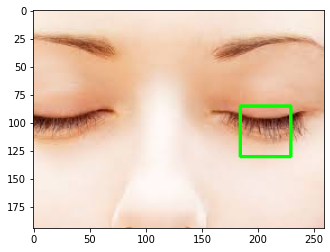

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**Cropping the eye image**

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(faceCascode.empty()) 
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eye_cascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes are not detected")
  else:
    for (ex,ey, ew,eh) in eyess:
      eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]


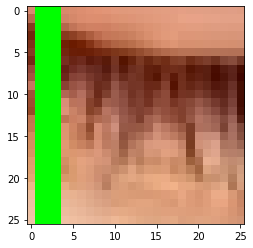

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi.shape

(26, 26, 3)

In [ ]:
final_image = cv2.resize(eyes_roi, (224, 224)) 
final_image = np.expand_dims(final_image, axis =0) 
final_image=final_image/255.0





In [ ]:
final_image.shape

(1, 224, 224, 3)

In [ ]:
new_model.predict(final_image)  # 0 --> closed  & 1 --> open

array([[0.05255941]], dtype=float32)